# GEOG 497 - Spring 2022 - Cryosphere & Climate Systems
### A4: Greenland ice sheet SMB

### Code to calculate time series of SMB variables from RACMO2.3p2 over the Greenland ice sheet

Input data: Annual SMB/SMB components at 1 km spatial resolution
* Reference: https://advances.sciencemag.org/content/5/9/eaaw0123
        
You will need to specify:
* Start and end years over which the mean of a variable of interest will be calculated
* Variable and input file names
* Plot titles, min/max values, and contour interval

Output:
* Line plot and/or text data

### Run the following code block first:

In [1]:
# import python packages that allow for data reading, analysis, and plotting
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfe
import pandas as pd

%config InlineBackend.figure_format = 'retina' # make high res plots

# where are the data located?
dataFolder = '/gpfs/group/ljt5282/default/ClimateModels/RACMO2.3p2-d055/yearly/'

ERROR 1: PROJ: proj_create_from_database: Open of /storage/work/czt5321/conda/envs/geospatial-geog497-sp22/share/proj failed


**These are the available yearly (sum or mean) RACMO2.3p2 data to plot**

In the code block below that does the plotting, you will need to specify the filename and variable name for one or more of these fields. 

| Variable type   | Units  | Filename | Variable name | 
|-----------------|--------|----------|---------------|
| Precipitation (solid + liquid) | mm w.e. | precip.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | precipcorr |
| Refreeze | mm w.e. | refreeze.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | refreezecorr |
| Runoff | mm w.e. | runoff.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc  | runoffcorr |
| SMB | mm w.e. | smb_rec.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM.nc_fix_yearsum.nc  | SMB_rec  |
| Snowfall | mm w.e. | snowfall.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | snowfallcorr |
| Snowmelt | mm w.e. | snowmelt.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | snowmeltcorr |
| Sublimation | mm w.e. | subl.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | sublcorr |
| 2-m air temperature | K | t2m.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearmean.nc | t2mcorr |

Advice:
* You can edit the code below to load, calculate, and plot more variables with a little effort. 
* Alternatively, you can use the last code block to display the time series as text data that you could copy/paste into another program for plotting/analysis. 

In [7]:
# Set desired file names and variable names into two seperate lists
fileList = ['smb_rec.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM.nc_fix_yearsum.nc',
            'snowmelt.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc',
            'refreeze.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc',
            'runoff.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc',
            'snowfall.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc']

varList = ['SMB_rec', 'snowmeltcorr', 'refreezecorr', 'runoffcorr', 'snowfallcorr']

# Read in the variables
for fileName, varName in zip(fileList, varList):
    readCmnd = varName + " = xr.open_dataset('" + dataFolder + fileName + "', decode_times=False)"
    print(readCmnd)
    exec(readCmnd)

SMB_rec = xr.open_dataset('/gpfs/group/ljt5282/default/ClimateModels/RACMO2.3p2-d055/yearly/smb_rec.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM.nc_fix_yearsum.nc', decode_times=False)
snowmeltcorr = xr.open_dataset('/gpfs/group/ljt5282/default/ClimateModels/RACMO2.3p2-d055/yearly/snowmelt.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc', decode_times=False)
refreezecorr = xr.open_dataset('/gpfs/group/ljt5282/default/ClimateModels/RACMO2.3p2-d055/yearly/refreeze.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc', decode_times=False)
runoffcorr = xr.open_dataset('/gpfs/group/ljt5282/default/ClimateModels/RACMO2.3p2-d055/yearly/runoff.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc', decode_times=False)
snowfallcorr = xr.open_dataset('/gpfs/group/ljt5282/default/ClimateModels/RACMO2.3p2-d055/yearly/snowfall.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc', decode_times=False)


In [8]:
# Define new time dimension
SMB_rec['time'] = pd.date_range(start='1958-01-01', periods=60, freq='YS')
snowmeltcorr['time'] = pd.date_range(start='1958-01-01', periods=60, freq='YS')
refreezecorr['time'] = pd.date_range(start='1958-01-01', periods=60, freq='YS')
runoffcorr['time'] = pd.date_range(start='1958-01-01', periods=60, freq='YS')
snowfallcorr['time'] = pd.date_range(start='1958-01-01', periods=60, freq='YS')

In [14]:
# Calculate annual SMB for full GrIS
smb = SMB_rec['SMB_rec'].sum(dim=('y','x')) # sums across x and y dimensions, units 
smbGT = smb * 1e-6 * 1 * 1

# Annual snowmelt
snowmelt = snowmeltcorr['snowmeltcorr'].sum(dim=('lat', 'lon'))
snowmeltGT = snowmelt * 1e-6 * 1 * 1

# Annual refreeze
refreeze = refreezecorr['refreezecorr'].sum(dim=('lat','lon'))
refreezeGT = refreeze * 1e-6 * 1 * 1

# Annual runoff
runoff = runoffcorr['runoffcorr'].sum(dim=('lat', 'lon'))
runoffGT = runoff * 1e-6 * 1 * 1

# Annual snowfall
snowfall = snowfallcorr['snowfallcorr'].sum(dim=('lat', 'lon'))
snowfallGT = snowfall * 1e-6 * 1 * 1

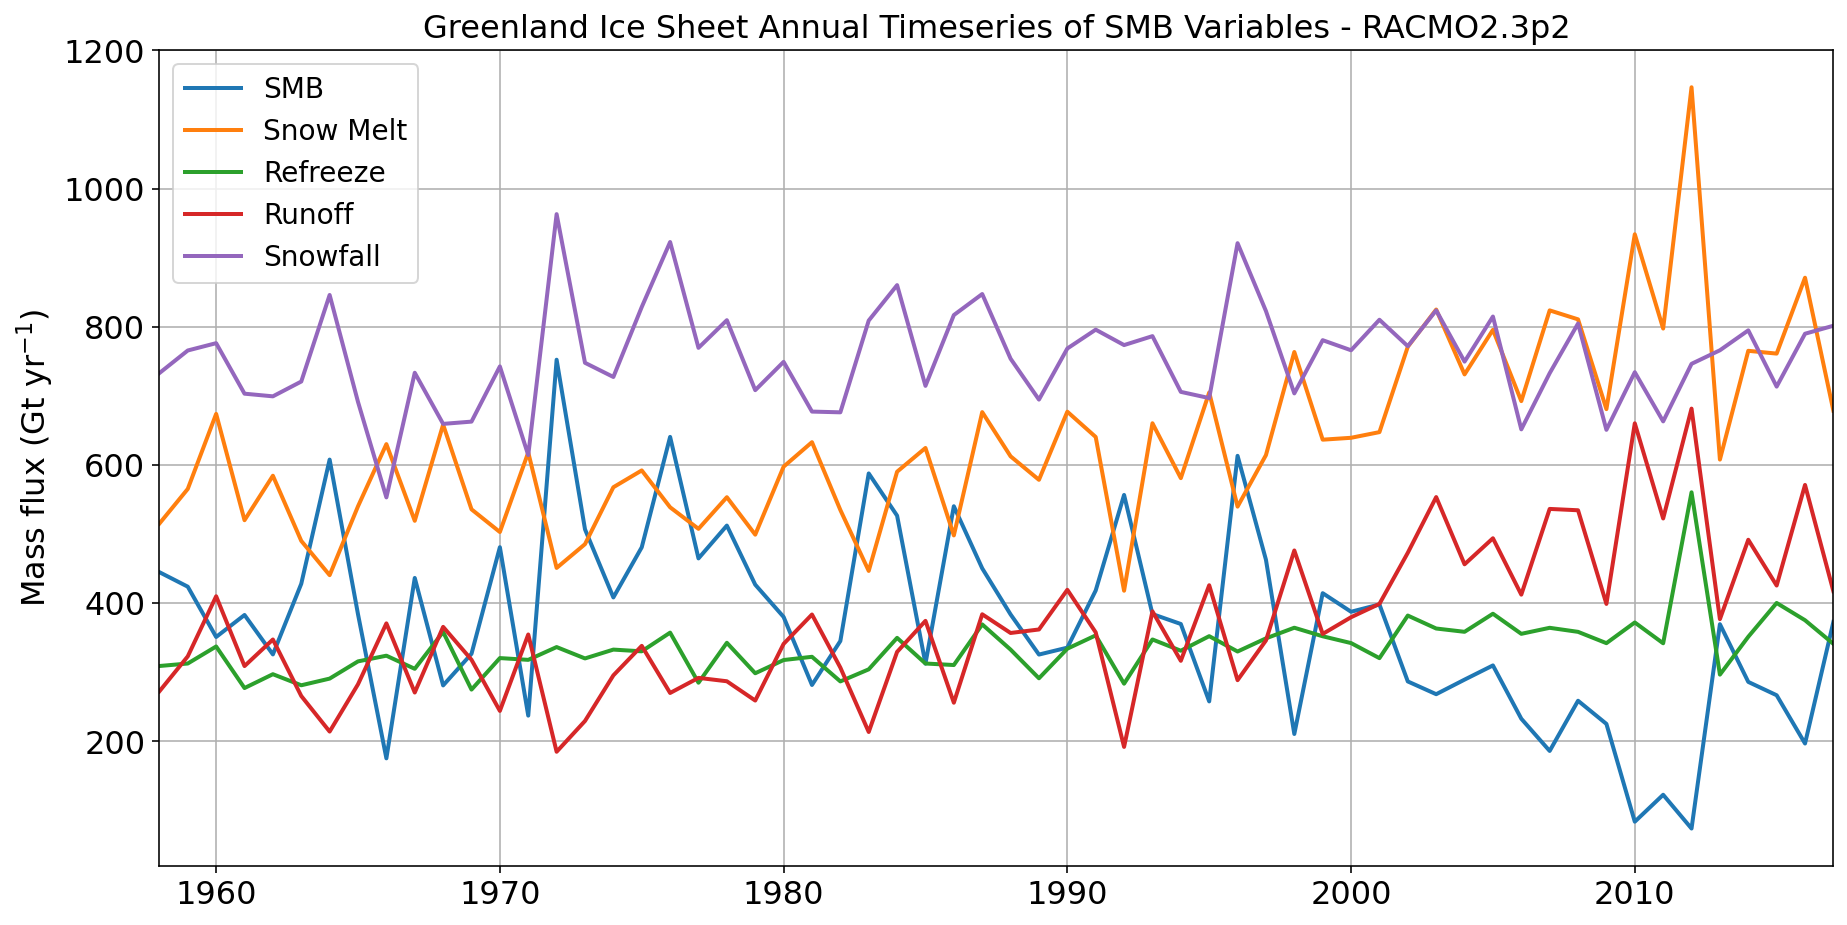

In [19]:
# Set up figure
fig, ax = plt.subplots(figsize=(15, 7.5))
year = np.arange(1958, 2017 + 1)

# Plot data
smbGT_plot = ax.plot(year, smbGT, '-', linewidth=2, label='SMB')
snowmelt_plot = ax.plot(year, snowmeltGT, '-', linewidth=2, label='Snow Melt')
refreeze_plot = ax.plot(year, refreezeGT, '-', linewidth=2, label='Refreeze')
runoff_plot = ax.plot(year, runoffGT, '-', linewidth=2, label='Runoff')
snowfall_plot = ax.plot(year, snowfallGT, '-', linewidth=2, label='Snowfall')

# Configure parameters
ax.set(xlim=[1958, 2017])
ax.grid(True)
legend = ax.legend(fontsize=14)
ax.set_ylabel('Mass flux (Gt yr$^{-1}$)', fontsize=16)
ax.tick_params(labelsize=16)
plt.title("Greenland Ice Sheet Annual Timeseries of SMB Variables - RACMO2.3p2", fontsize=16)

# Save figure
plt.savefig('./Figures/GrIS-SMB.png', bbox_inches='tight', facecolor='white', dpi=300)

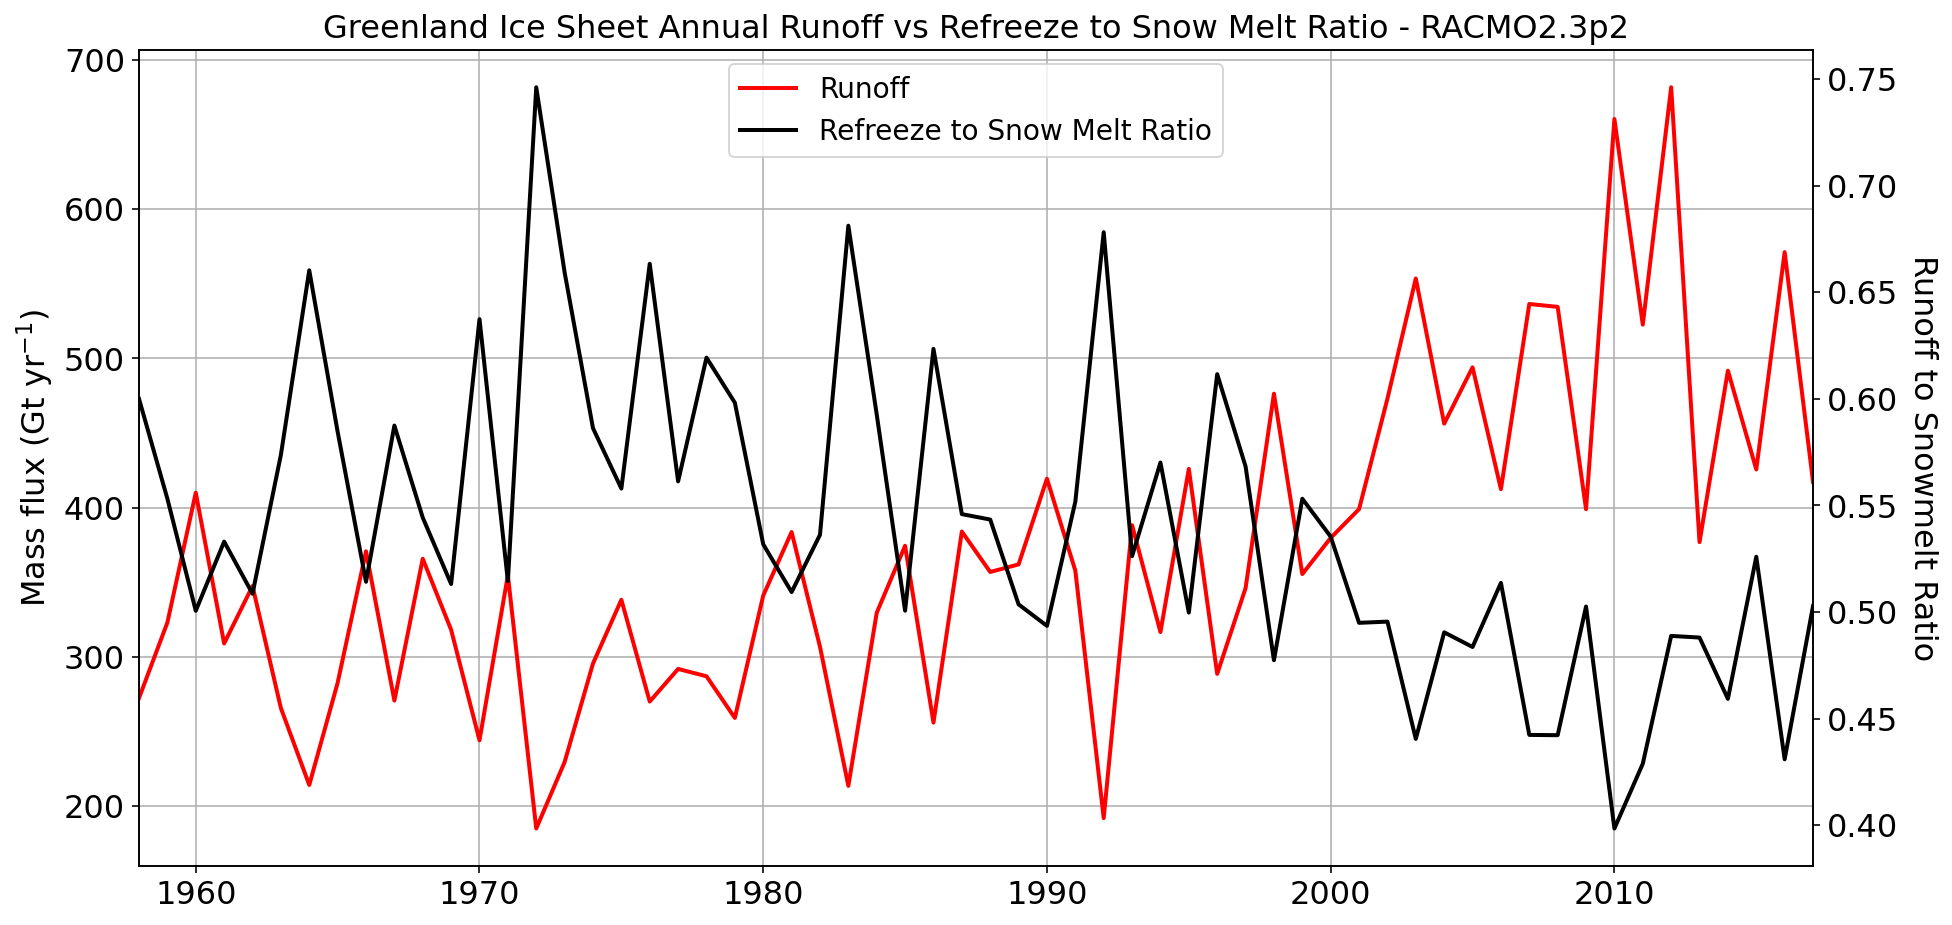

In [36]:
# Calculate refreeze to snow melt ratio
refreezeSnowMeltRatio = refreezeGT / snowmeltGT

# Set up figure
fig, ax = plt.subplots(figsize=(15, 7.5))
year = np.arange(1958, 2017+1)

# Plot runoff
runoff_plot = ax.plot(year, runoffGT, '-', linewidth=2, color='red', label='Runoff')

# Plot the refreeze to snow melt ratio on separate axis
ax2 = ax.twinx()
ratio_plot = ax2.plot(year, refreezeSnowMeltRatio, '-', linewidth=2, color='black', label='Refreeze to Snow Melt Ratio')

# Combine legends
lns = runoff_plot+ratio_plot
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', fontsize=14)

# Configure parameters
ax.set(xlim=[1958, 2017])
ax.grid(True)
ax.set_ylabel('Mass flux (Gt yr$^{-1}$)', fontsize=16)
ax2.set_ylabel('Runoff to Snowmelt Ratio', fontsize=16, rotation=270, labelpad=20)
ax.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
plt.title('Greenland Ice Sheet Annual Runoff vs Refreeze to Snow Melt Ratio - RACMO2.3p2', fontsize=16)

# Save figure
plt.savefig('./Figures/GrIS-RunoffvsRatio.png', bbox_inches='tight', facecolor='white', dpi=300)

In [ ]:
# print data, e.g., to bring into another program to plot
varToPrint = smbGT # <- set this using on of your datasets from the plot
for i in range(len(varToPrint)):
    print(year[i], varToPrint[i].values)